<a href="https://colab.research.google.com/github/yangjik/yang.study/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A3%BC%ED%83%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 분석 목표 : 주택 가격을 결정하는 다양한 요소들 중, 어떤 요소가 가장 영향력 있는지 데이터를 통해 확인 및 시각화.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

### 데이터 출처

- https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset
- 컬럼 의미
  - CRIM: 자치 시(town)별 1인당 범죄율
  - ZN: 25,000 평방피트를 초과하는 거주지역의 비율
  - INDUS: 비소매 상업지역이 점유하고 있는 토지의 비율
  - CHAS: 찰스강에 대한 더미변수(강의 경계에 위치: 1, 아닌 경우: 0)
  - NOX: 10ppm당 농축 일산화질소
  - RM: 주택 1가구당 평균 방의 개수
  - AGE: 1940년 이전에 건축된 소유주택의 비율
  - DIS: 5개의 보스턴 직업센터까지의 접근성 지수
  - RAD: 방사형 도로까지의 접근성 지수
  - TAX: 10,000 달러당 재산세율
  - PTRATIO: 자치시(town)별 학생 대 교사 비율
  - B: 1000(Bk-0.63)^2 (Bk: 자치 시별 아프리카계 미국인 비율)
  - LSTAT: 모집단의 하위계층 비율(%)
  - MEDV: 본인 소유의 주택가격(중앙값) (단위: 1,000달러)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 파일 경로 및 파일 불러오기
file_path = '/content/drive/MyDrive/새싹교육/미니프로젝트/보스턴주택/housing.csv'
house_df = pd.read_csv(file_path, header=None, sep="\s+")
house_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#house_df.columns = ['범죄율', '거주지역비율', '토지비율', '강접근성', '일산화질소농도', '방의개수', '40년이전주택비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '교포', '하위계층비율', '집값']

데이터 구성 확인

In [ ]:
# 데이터 확인
house_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [ ]:
house_df.shape

(506, 14)

In [ ]:
# 데이터 정보 확인
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# NaN 값 확인
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

데이터간 상관관계 알아보기위해 상관계수 확인

In [ ]:
# 상관계수 확인
house_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


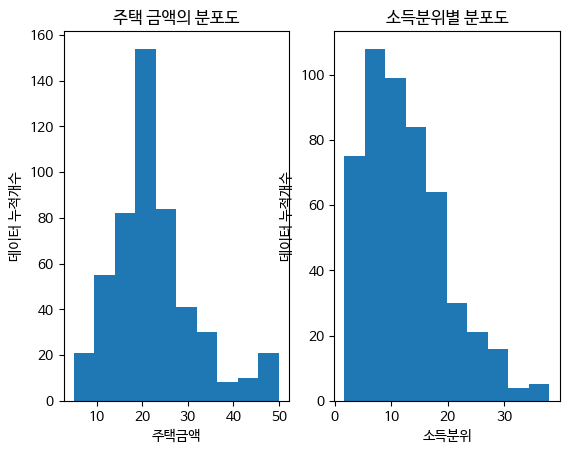

In [ ]:
# 주택 금액의 분포도 확인, 소득분위별 분포도 확인

plt.subplot(1, 2, 1)
plt.hist(house_df['MEDV'])
plt.title('주택 금액의 분포도')
plt.xlabel('주택금액')
plt.ylabel('데이터 누적개수')

plt.subplot(1, 2, 2)
plt.hist(house_df['LSTAT'])
plt.title('소득분위별 분포도')
plt.xlabel('소득분위')
plt.ylabel('데이터 누적개수')

plt.show()

위 결과를 확인하면 주택금액은 20만달러쪽에 많이 분포되어있다.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


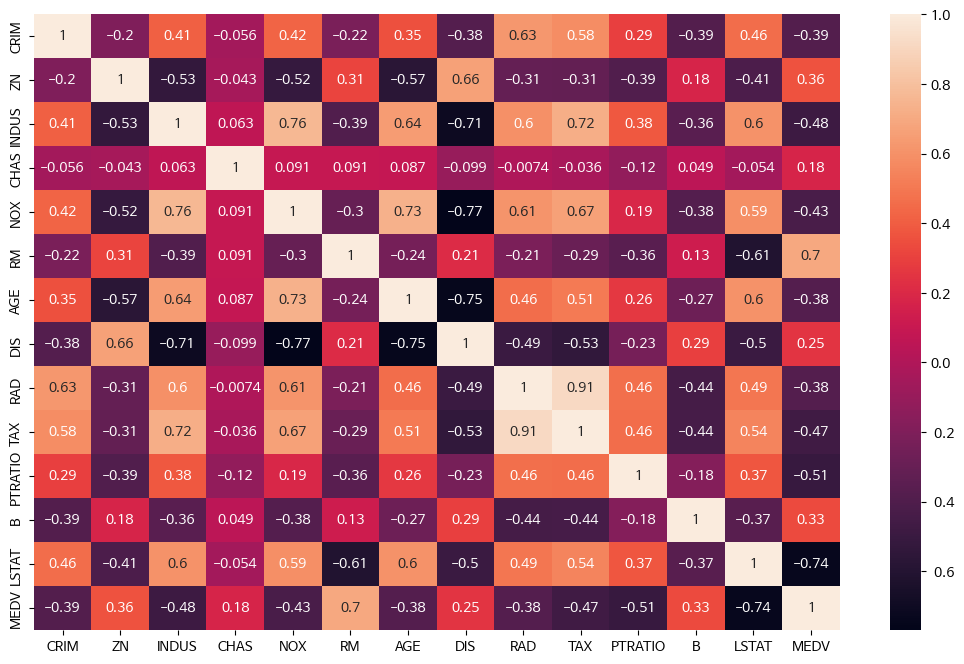

In [ ]:
# 히트맵 그리기
plt.figure(figsize=(13,8))
sns.heatmap(data = house_df.corr(), annot=True)

plt.show()

위 히트맵에서 상관관계가 있는 컬럼은 TAX, RAD 이다.

In [ ]:
# RAD 데이터 구성 확인
house_df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [ ]:
# rad =1 인 세금 확인
house_df[house_df['RAD'] == 1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
193,0.02187,60.0,2.93,0,0.4010,6.800,9.9,6.2196,1,265.0,15.6,393.37,5.03,31.1
194,0.01439,60.0,2.93,0,0.4010,6.604,18.8,6.2196,1,265.0,15.6,376.70,4.38,29.1
254,0.04819,80.0,3.64,0,0.3920,6.108,32.0,9.2203,1,315.0,16.4,392.89,6.57,21.9
255,0.03548,80.0,3.64,0,0.3920,5.876,19.1,9.2203,1,315.0,16.4,395.18,9.25,20.9
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16,50.0
284,0.00906,90.0,2.97,0,0.4000,7.088,20.8,7.3073,1,285.0,15.3,394.72,7.85,32.2
285,0.01096,55.0,2.25,0,0.3890,6.453,31.9,7.3073,1,300.0,15.3,394.72,8.23,22.0
286,0.01965,80.0,1.76,0,0.3850,6.230,31.5,9.0892,1,241.0,18.2,341.60,12.93,20.1
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304.0,16.9,394.02,12.43,17.1


In [ ]:
# 세금이랑 도로까지 접근성 관계? 때문에 주택 가격이 높다?
house_df[['TAX', 'RAD', 'MEDV']]

,TAX,RAD,MEDV
0,296.0,1,24.0
1,242.0,2,21.6
2,242.0,2,34.7
3,222.0,3,33.4
4,222.0,3,36.2
...,...,...,...
501,273.0,1,22.4
502,273.0,1,20.6
503,273.0,1,23.9
504,273.0,1,22.0


In [ ]:
house_df[['TAX', 'RAD', 'MEDV']].sort_values(by = 'MEDV', ascending=False).head(20)

,TAX,RAD,MEDV
283,198.0,1,50.0
225,307.0,8,50.0
369,666.0,24,50.0
370,666.0,24,50.0
371,666.0,24,50.0
372,666.0,24,50.0
186,193.0,3,50.0
204,224.0,4,50.0
257,264.0,5,50.0
195,255.0,4,50.0


In [ ]:
medv_sort = house_df.sort_values(by = 'MEDV', ascending=False)
medv_sort

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98,7.0
399,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666.0,20.2,338.16,29.97,6.3
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666.0,20.2,396.90,26.77,5.6
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59,5.0


In [ ]:
# 주택가격이 가장 높을 경우 상관관계
max = house_df[house_df['MEDV'] == 50.0]
max

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44,50.0


In [ ]:
max

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44,50.0


In [ ]:
max.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.480516,0.660683,0.323170,0.664180,-0.801550,0.606778,-0.680608,0.935586,0.937833,0.830326,-0.699966,0.532343,NaN
ZN,-0.480516,1.000000,-0.708856,-0.092516,-0.825824,0.292432,-0.900377,0.909537,-0.453632,-0.571222,-0.483755,0.483316,-0.230125,NaN
INDUS,0.660683,-0.708856,1.000000,0.382778,0.782721,-0.530818,0.857220,-0.775744,0.568789,0.797323,0.478030,-0.580824,-0.006276,NaN
CHAS,0.323170,-0.092516,0.382778,1.000000,0.210729,-0.154376,0.173135,-0.145657,0.272603,0.360872,0.218129,-0.016705,-0.124073,NaN
NOX,0.664180,-0.825824,0.782721,0.210729,1.000000,-0.446067,0.930544,-0.967856,0.612594,0.738956,0.422979,-0.599451,0.325462,NaN
RM,-0.801550,0.292432,-0.530818,-0.154376,-0.446067,1.000000,-0.382898,0.459807,-0.841186,-0.824432,-0.789940,0.606978,-0.270329,NaN
AGE,0.606778,-0.900377,0.857220,0.173135,0.930544,-0.382898,1.000000,-0.952348,0.574506,0.732138,0.464453,-0.533411,0.169910,NaN
DIS,-0.680608,0.909537,-0.775744,-0.145657,-0.967856,0.459807,-0.952348,1.000000,-0.654114,-0.752032,-0.541519,0.592641,-0.342571,NaN
RAD,0.935586,-0.453632,0.568789,0.272603,0.612594,-0.841186,0.574506,-0.654114,1.000000,0.946000,0.906502,-0.592577,0.406889,NaN
TAX,0.937833,-0.571222,0.797323,0.360872,0.738956,-0.824432,0.732138,-0.752032,0.946000,1.000000,0.825187,-0.649044,0.284507,NaN


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


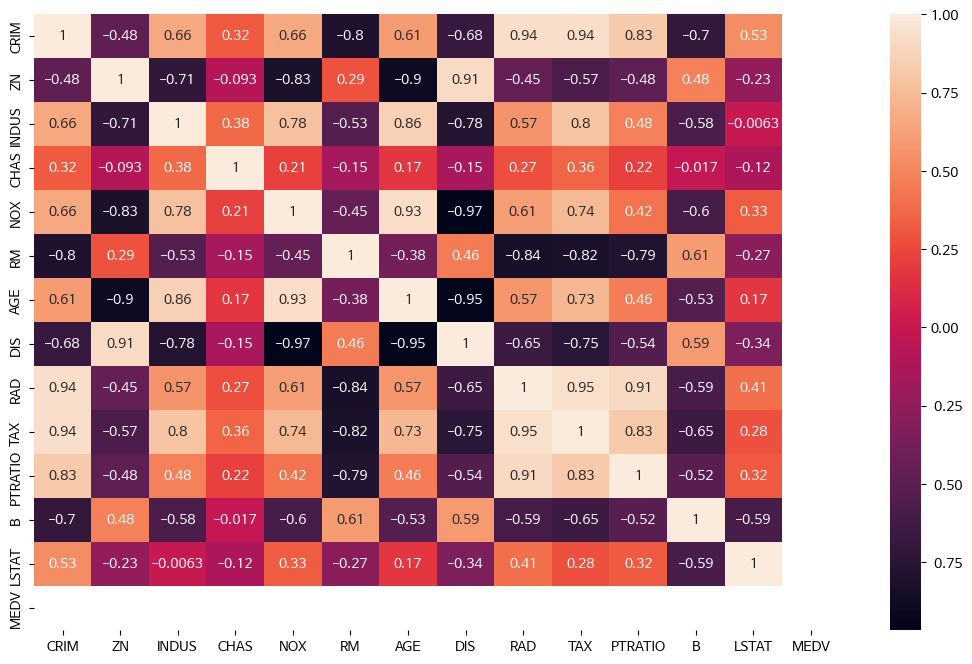

In [ ]:
# 주택 가격이 가장 높을 경우 상관관계 구성확인
plt.figure(figsize=(13,8))
sns.heatmap(data = max.corr(), annot=True)

plt.show()

In [ ]:
# 주택가격이 낮을 경우 상관관계
min = house_df[house_df['MEDV'] <= 10.0]
min

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666.0,20.2,285.83,30.63,8.8
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666.0,20.2,396.90,30.81,7.2
387,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666.0,20.2,396.90,31.99,7.4
392,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666.0,20.2,396.90,25.68,9.7
397,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,24,666.0,20.2,393.10,19.92,8.5
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59,5.0
399,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666.0,20.2,338.16,29.97,6.3
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666.0,20.2,396.90,26.77,5.6
401,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666.0,20.2,396.90,20.32,7.2
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77,8.3


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


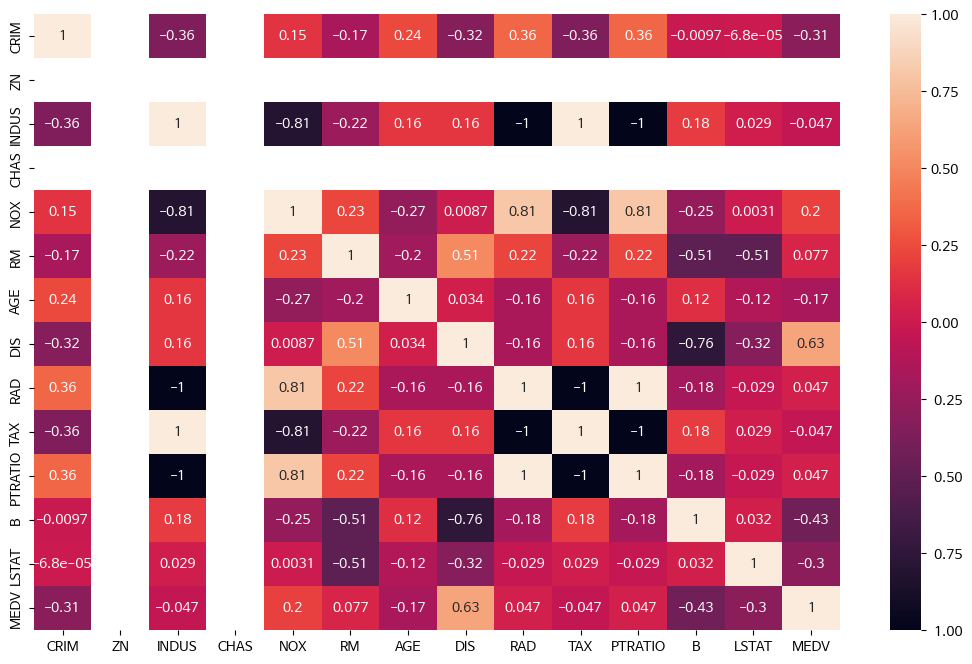

In [ ]:
# 주택 가격이 낮을 경우 상관관계 구성확인
plt.figure(figsize=(13,8))
sns.heatmap(data = min.corr(), annot=True)

plt.show()

In [ ]:
df_column = house_df.columns.tolist()
df_column

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [ ]:
len(df_column)

14

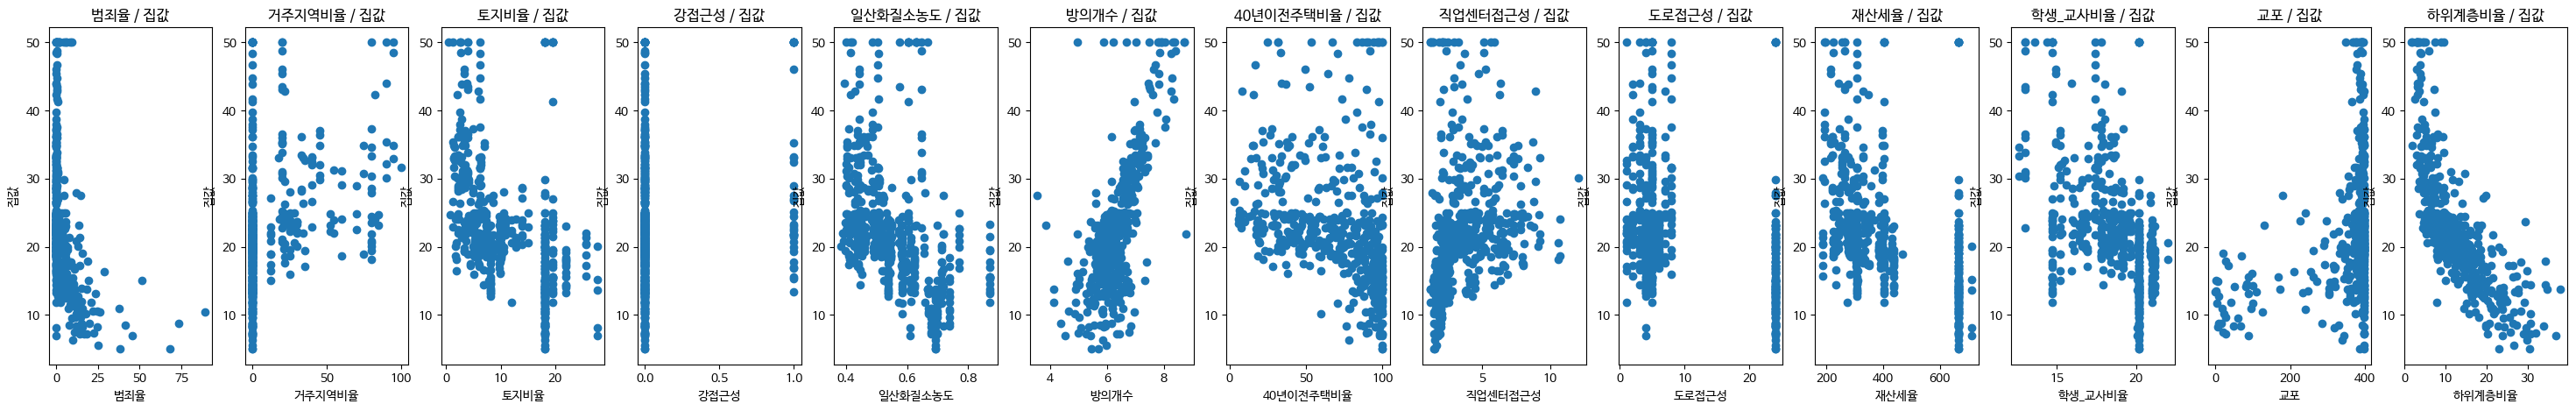

In [ ]:
plt.figure(figsize=(40,5))
index = 0
b = 1
kr_name = ['범죄율', '거주지역비율', '토지비율', '강접근성', '일산화질소농도', '방의개수', '40년이전주택비율', '직업센터접근성', '도로접근성', '재산세율', '학생_교사비율', '교포', '하위계층비율', '집값']
for col in df_column:
  if b > len(df_column):
    break
  else:
    if kr_name[index] == '집값':
      break
    else:
      plt.subplot(1,14, b)
      plt.title(kr_name[index] + ' / 집값')
      plt.scatter(y= 'MEDV', x= col, data = house_df)
      plt.xlabel(kr_name[index])
      plt.ylabel('집값')
  index = index + 1
  b = b + 1

plt.show()

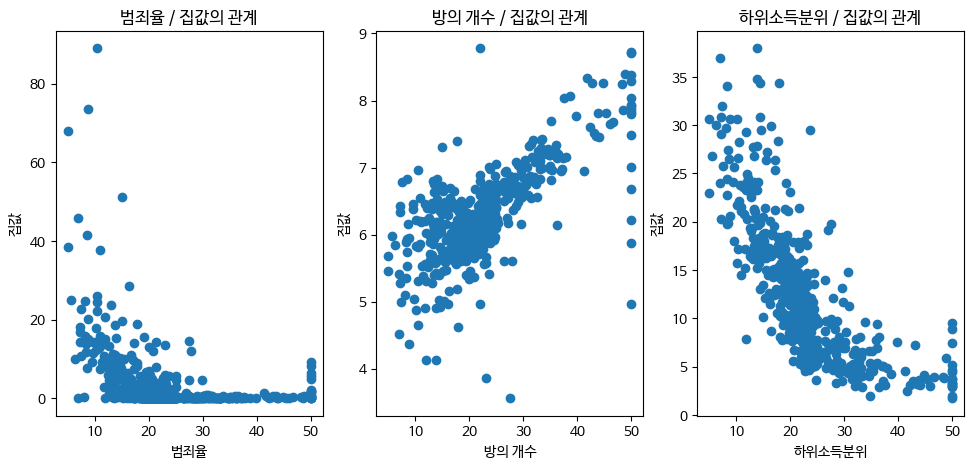

In [ ]:
# 영향력있는 컬럼

plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.title('범죄율 / 집값의 관계')
plt.scatter(x='MEDV', y='CRIM', data=house_df)
plt.xlabel('범죄율')
plt.ylabel('집값')

plt.subplot(1,5,2)
plt.title('방의 개수 / 집값의 관계')
plt.scatter(x='MEDV', y='RM', data=house_df)
plt.xlabel('방의 개수')
plt.ylabel('집값')

plt.subplot(1,5,3)
plt.title('하위소득분위 / 집값의 관계')
plt.scatter(x='MEDV', y='LSTAT', data=house_df)
plt.xlabel('하위소득분위')
plt.ylabel('집값')

plt.show()

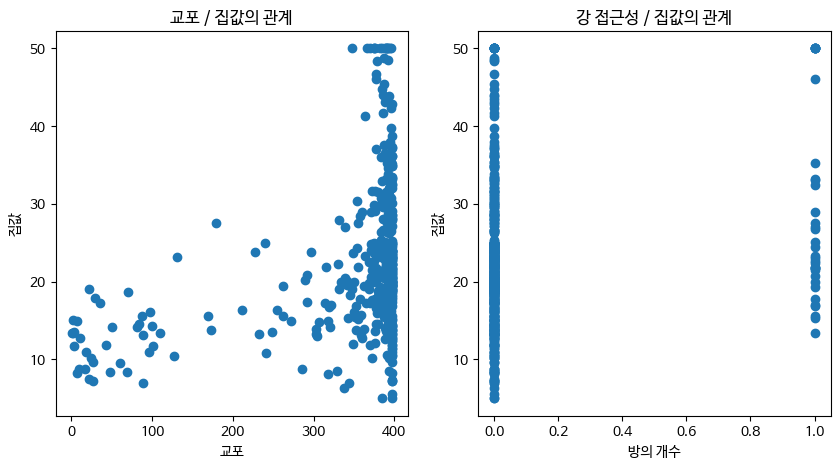

In [ ]:
# 영향력 없는 컬럼

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('교포 / 집값의 관계')
plt.scatter(y='MEDV', x='B', data=house_df)
plt.xlabel('교포')
plt.ylabel('집값')

plt.subplot(1,2,2)
plt.title('강 접근성 / 집값의 관계')
plt.scatter(y='MEDV', x='CHAS', data=house_df)
plt.xlabel('방의 개수')
plt.ylabel('집값')

plt.show()

# 결론

집값이 높게 측정된 곳에서 연관있는 컬럼은 CRIM(범죄율), RM(방의 개수), LSTAT(소득계층-하위기준)이렇게 3개 컬럼이 영향력이있습니다.
<br>
반면에 집값에 가장 영향력이 없는 컬럼은 B(교포), CHAS(강 접근성)입니다.

선형회귀를 이용해서 예측하기


In [ ]:
# 주택 가격 기준으로 상관관계 있는 컬럼 데이터 프레임 만들기

input_data = house_df[['CRIM', 'RM', 'LSTAT']]
target_data = house_df[['MEDV']]

In [ ]:
input_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [ ]:
target_data.shape

(506, 1)

In [ ]:
target_data.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
# train, test 데이터 분리하기.
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, random_state=42, train_size=0.8)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
train_input[:3]

,CRIM,RM,LSTAT
477,15.02340,5.304,24.91
15,0.62739,5.834,8.47
332,0.03466,6.031,7.83


In [ ]:
lr.fit(train_input, train_target)

LinearRegression()

In [ ]:
lr.predict(test_input)[:5]

array([[25.70806039],
       [30.71362566],
       [18.22383291],
       [25.71515062],
       [19.81083607]])

In [ ]:
train_target.shape, test_target.shape

((404, 1), (102, 1))

In [ ]:
print('train : ', lr.score(train_input, train_target), '\ntest : ', lr.score(test_input, test_target))

train :  0.661647365070249 
test :  0.5597889830000125


# 표준화

- 평균 0 분산 1 -> 기준은 0으로 두고 좌우측으로 최대 +1 -1 범위 안으로 지정

In [ ]:
# 주택 가격 기준으로 상관관계 있는 컬럼 데이터 프레임 만들기

input_data = house_df[['CRIM', 'RM', 'LSTAT']]
target_data = house_df[['MEDV']]

In [ ]:
# 위 학습 결과가 너무 낮게 나와서 data를 표준화로 재정의
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [ ]:
train_ss = ss.fit_transform(train_input)
test_ss = ss.fit_transform(test_input)

In [ ]:
train_ss

array([[ 1.28770177, -1.42806858,  1.75350503],
       [-0.33638447, -0.68008655, -0.5614742 ],
       [-0.40325332, -0.40206304, -0.65159505],
       ...,
       [-0.40547014,  0.45035421, -0.91069248],
       [ 0.85189733,  0.44188648,  1.52257036],
       [-0.38135592,  0.12575823, -0.25731635]])

In [ ]:
lr.fit(train_ss, train_target)

LinearRegression()

In [ ]:
test_target[:5]

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1


In [ ]:
print(lr.predict(test_input)[:5])

[[ 12.18040865]
 [ 35.49639332]
 [-25.4766887 ]
 [ 24.79202304]
 [-26.53435004]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
# 분리 후 표준화
print('train score: ', lr.score(train_input, train_target), '\ntest score: ', lr.score(test_input, test_target))

train score:  -17.896382019882783 
test score:  -25.380074783100582


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


↑
예측 데이터를 확인했을때 음수가 나오는 이유는 사전에 표준화를 진행했기때문에 input 데이터가 음수로 존재하기때문이다. 음수의 값이 아니라 양수의 값을 얻기위해서는 decoding 작업을 진행해야한다.

<br>
<br>

In [ ]:
# 주택 가격 기준으로 상관관계 있는 컬럼 데이터 프레임 만들기

input_data = house_df[['CRIM', 'RM', 'LSTAT']]
target_data = house_df[['MEDV']]

In [ ]:
# 위 학습 결과가 너무 낮게 나와서 data를 표준화로 재정의
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
after = ss.fit_transform(input_data)
after

array([[-0.41978194,  0.41367189, -1.0755623 ],
       [-0.41733926,  0.19427445, -0.49243937],
       [-0.41734159,  1.28271368, -1.2087274 ],
       ...,
       [-0.41344658,  0.98496002, -0.98304761],
       [-0.40776407,  0.72567214, -0.86530163],
       [-0.41500016, -0.36276709, -0.66905833]])

In [ ]:
# train, test 데이터 분리하기.
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(after, target_data, random_state=42, train_size=0.8)

In [ ]:
lr.fit(train_input, train_target)

LinearRegression()

In [ ]:
# 표준화 후 데이터 분리
print('train score: ', lr.score(train_input, train_target), '\ntest score: ', lr.score(test_input, test_target))

train score:  0.661647365070249 
test score:  0.5597889830000123


In [ ]:
test_target[:5]

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1


In [ ]:
print(lr.predict(test_input)[:5])

[[25.70806039]
 [30.71362566]
 [18.22383291]
 [25.71515062]
 [19.81083607]]


In [ ]:
# 기울기, 절편 확인
#lr.coef_, lr.intercept_

# 정규화

데이터를 0 ~ 1사이로 지정

In [ ]:
# 주택 가격 기준으로 상관관계 있는 컬럼 데이터 프레임 만들기

input_data = house_df[['CRIM', 'RM', 'LSTAT']]
target_data = house_df[['MEDV']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
min_max_movie = min_max_scaler.fit_transform(input_data)

In [ ]:
# train, test 데이터 분리하기.
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, random_state=42, train_size=0.8)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(train_input, train_target)

LinearRegression()

In [ ]:
print('train score: ', lr.score(train_input, train_target), '\ntest score: ', lr.score(test_input, test_target))

train score:  0.661647365070249 
test score:  0.5597889830000125


In [ ]:
print(lr.predict(test_input)[:5])

[[25.70806039]
 [30.71362566]
 [18.22383291]
 [25.71515062]
 [19.81083607]]


In [ ]:
test_target[:5]

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
